# Task 3 - CUSTOMER CHURN PREDICTION

In [670]:
"""Develop a model to predict customer churn for a subscription based service or business. 
Use historical customer data, including features like usage behavior and customer demographics, and 
try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn."""

'Develop a model to predict customer churn for a subscription based service or business. \nUse historical customer data, including features like usage behavior and customer demographics, and \ntry algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.'

# 1. Read or Extract Data

In [671]:
import pandas as pd
data=pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# 2. EDA - Explanatory Data Analysis

In [672]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [673]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [674]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 3. Data preprocessing - Feature scaling, encoding

In [675]:
print("Number of unique values : ",len(data["Geography"].unique()),'\nList of unique values :',data["Geography"].unique())


Number of unique values :  3 
List of unique values : ['France' 'Spain' 'Germany']


In [676]:
from sklearn.preprocessing import LabelEncoder
sc=LabelEncoder()
data["Geography"]=sc.fit_transform(data["Geography"])
print("Number of unique values : ",len(data["Geography"].unique()),'\nList of unique values :',data["Geography"].unique())


Number of unique values :  3 
List of unique values : [0 2 1]


In [677]:
print("Number of unique values : ",len(data["Gender"].unique()),'\nList of unique values :',data["Gender"].unique())

Number of unique values :  2 
List of unique values : ['Female' 'Male']


In [678]:
from sklearn.preprocessing import LabelEncoder
sc=LabelEncoder()
data["Gender"]=sc.fit_transform(data["Gender"])
print("Number of unique values : ",len(data["Gender"].unique()),'\nList of unique values :',data["Gender"].unique())

Number of unique values :  2 
List of unique values : [0 1]


In [679]:
print("Number of unique values : ",len(data["Surname"].unique()),'\nList of unique values :',data["Surname"].unique())

Number of unique values :  2932 
List of unique values : ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']


In [680]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np


ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2])],remainder='passthrough')
data.iloc[:,2]=np.array(ct.fit_transform(data))

data["Surname"]

0         (0, 1115)\t1.0\n  (0, 2932)\t1.0\n  (0, 2933...
1         (0, 1177)\t1.0\n  (0, 2932)\t2.0\n  (0, 2933...
2         (0, 2040)\t1.0\n  (0, 2932)\t3.0\n  (0, 2933...
3         (0, 289)\t1.0\n  (0, 2932)\t4.0\n  (0, 2933)...
4         (0, 1822)\t1.0\n  (0, 2932)\t5.0\n  (0, 2933...
                              ...                        
9995      (0, 1999)\t1.0\n  (0, 2932)\t9996.0\n  (0, 2...
9996      (0, 1336)\t1.0\n  (0, 2932)\t9997.0\n  (0, 2...
9997      (0, 1570)\t1.0\n  (0, 2932)\t9998.0\n  (0, 2...
9998      (0, 2345)\t1.0\n  (0, 2932)\t9999.0\n  (0, 2...
9999      (0, 2751)\t1.0\n  (0, 2932)\t10000.0\n  (0, ...
Name: Surname, Length: 10000, dtype: object

In [681]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int32  
 5   Gender           10000 non-null  int32  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(9), object(1)
memory usage: 1015.8+ KB


In [682]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,"(0, 1115)\t1.0\n (0, 2932)\t1.0\n (0, 2933...",619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,"(0, 1177)\t1.0\n (0, 2932)\t2.0\n (0, 2933...",608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,"(0, 2040)\t1.0\n (0, 2932)\t3.0\n (0, 2933...",502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,"(0, 289)\t1.0\n (0, 2932)\t4.0\n (0, 2933)...",699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,"(0, 1822)\t1.0\n (0, 2932)\t5.0\n (0, 2933...",850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,"(0, 1999)\t1.0\n (0, 2932)\t9996.0\n (0, 2...",771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,"(0, 1336)\t1.0\n (0, 2932)\t9997.0\n (0, 2...",516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,"(0, 1570)\t1.0\n (0, 2932)\t9998.0\n (0, 2...",709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,"(0, 2345)\t1.0\n (0, 2932)\t9999.0\n (0, 2...",772,1,1,42,3,75075.31,2,1,0,92888.52,1


# 4. Feature Extraction

In [683]:
import matplotlib.pyplot as plt
import seaborn as sns
#sns.pairplot(data)
plt.show()

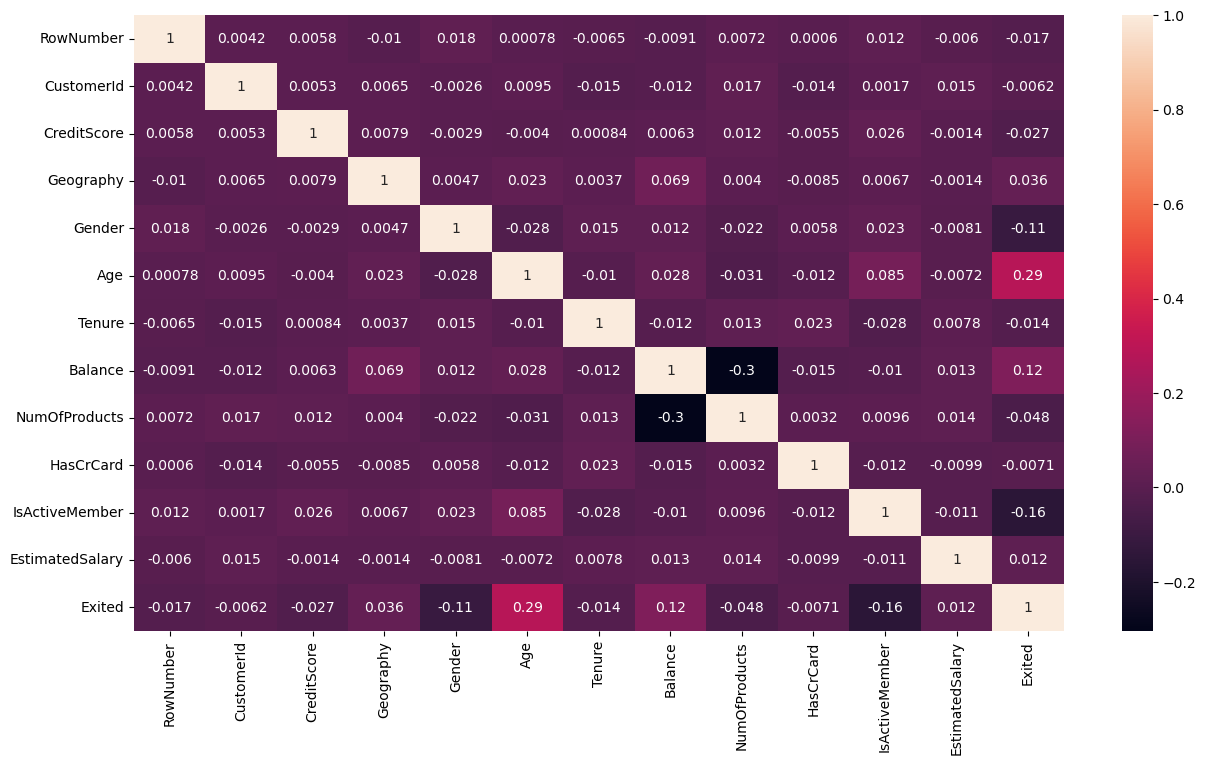

In [684]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[15,8])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [685]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [686]:
x=data.drop(columns=['Surname']).iloc[:,:-1]
y=data.iloc[:,-1].values

In [687]:
x

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,1,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,709,0,0,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52


In [688]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

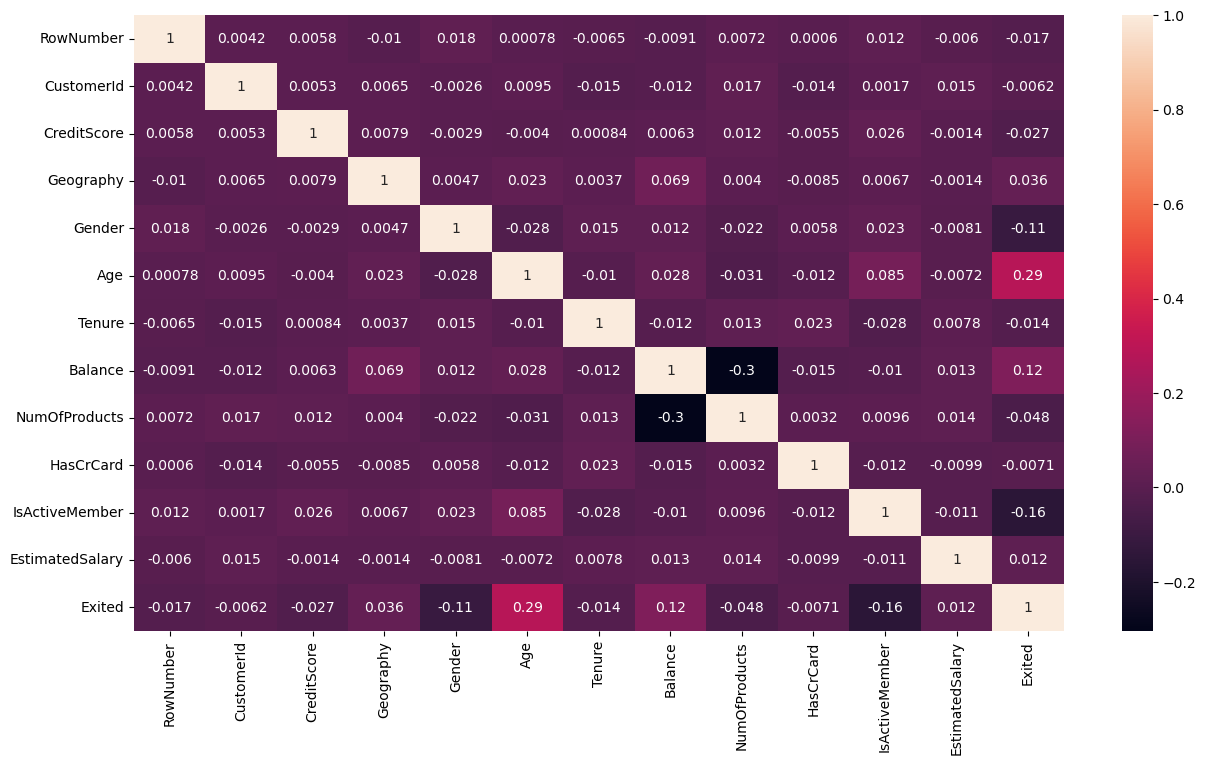

In [689]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=[15,8])
sns.heatmap(data.corr(),annot=True)
plt.show()

# 4. Model Building - Logistic Regression

In [706]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (7000, 12)
Shape of x_test :  (3000, 12)
Shape of y_train :  (7000,)
Shape of y_test :  (3000,)


In [707]:
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression(class_weight='balanced')
logR.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

# 5. Model Prediction and Evaluation

In [708]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,f1_score,confusion_matrix
import numpy as np

test_score=logR.score(x_test,y_test)
train_score=logR.score(x_train,y_train)
print("Testing score : ",test_score)
print("Train score : ",train_score)

Testing score :  0.49433333333333335
Train score :  0.5082857142857143


In [709]:
y_pred=logR.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [710]:
r2s=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
accsc=accuracy_score(y_test,y_pred)
f1s=f1_score(y_test,y_pred)
cm= confusion_matrix(y_test,y_pred)
print("R2 score : ",r2s)
print("Mean absolute error : ",mae)
print("Mean Squared error : ",mse)
print("Root Mean Squared error : ",rmse)
print("Accuracy score : ",accsc)
print("F1 Score : ",f1s)                    # harmonic mean of precision and recall
print("Confusion Matrix : \n",cm)

R2 score :  -2.2255000907194042
Mean absolute error :  0.5056666666666667
Mean Squared error :  0.5056666666666667
Root Mean Squared error :  0.711102430502573
Accuracy score :  0.49433333333333335
F1 Score :  0.34527406128614585
Confusion Matrix : 
 [[1083 1333]
 [ 184  400]]


# 6. Model Building - Random Forests

In [711]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (7000, 12)
Shape of x_test :  (3000, 12)
Shape of y_train :  (7000,)
Shape of y_test :  (3000,)


In [712]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(class_weight='balanced')
RFC.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced')

# 7. Model Prediction and Evaluation

In [713]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,f1_score,confusion_matrix
import numpy as np

test_score=RFC.score(x_test,y_test)
train_score=RFC.score(x_train,y_train)
print("Testing score : ",test_score)
print("Train score : ",train_score)

Testing score :  0.8686666666666667
Train score :  1.0


In [714]:
y_pred=RFC.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [715]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [716]:
r2s=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
accsc=accuracy_score(y_test,y_pred)
f1s=f1_score(y_test,y_pred)
cm= confusion_matrix(y_test,y_pred)
print("R2 score : ",r2s)
print("Mean absolute error : ",mae)
print("Mean Squared error : ",mse)
print("Root Mean Squared error : ",rmse)
print("Accuracy score : ",accsc)
print("F1 Score : ",f1s)                    # harmonic mean of precision and recall
print("Confusion Matrix : \n",cm)

R2 score :  0.16226299555474932
Mean absolute error :  0.13133333333333333
Mean Squared error :  0.13133333333333333
Root Mean Squared error :  0.36239941133138354
Accuracy score :  0.8686666666666667
F1 Score :  0.5542986425339367
Confusion Matrix : 
 [[2361   55]
 [ 339  245]]


# 8. Model Building - Gradient Boosting

In [717]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42)
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (7000, 12)
Shape of x_test :  (3000, 12)
Shape of y_train :  (7000,)
Shape of y_test :  (3000,)


In [718]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

# 9. Model Prediction and Evaluation

In [719]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,f1_score,confusion_matrix
import numpy as np

test_score=GBC.score(x_test,y_test)
train_score=GBC.score(x_train,y_train)
print("Testing score : ",test_score)
print("Train score : ",train_score)

Testing score :  0.8713333333333333
Train score :  0.8705714285714286


In [720]:
y_pred=GBC.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [721]:
r2s=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
accsc=accuracy_score(y_test,y_pred)
f1s=f1_score(y_test,y_pred)
cm= confusion_matrix(y_test,y_pred)
print("R2 score : ",r2s)
print("Mean absolute error : ",mae)
print("Mean Squared error : ",mse)
print("Root Mean Squared error : ",rmse)
print("Accuracy score : ",accsc)
print("F1 Score : ",f1s)                    # harmonic mean of precision and recall
print("Confusion Matrix : \n",cm)

R2 score :  0.17927288396988128
Mean absolute error :  0.12866666666666668
Mean Squared error :  0.12866666666666668
Root Mean Squared error :  0.35870136139505615
Accuracy score :  0.8713333333333333
F1 Score :  0.5776805251641137
Confusion Matrix : 
 [[2350   66]
 [ 320  264]]
